# Married at First Sight
The Lifetime reality television show and social experiment, Married at First Sight, features men and women who sign up to marry a complete stranger they've never met before. Experts pair couples based on tests and interviews. After marriage, couples have only a few short weeks together to decide if they want to stay married or get a divorce. There have been 10 full seasons so far which provides interesting data to look at what factors may or may not play a role in their decisions at the end of eight weeks as well as longer-term outcomes since the show aired.

In this notebook we try to train a Machine Learning model to predict the Status whether the men and women paired by different experts would remain married or not depending upon the information provided by the Dataset.

## Importing dependencies
Importing dependencies like numpy, pandas, sklearn, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, jaccard_similarity_score
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Fetching our data
Downloading our data from github gist using wget.

In [2]:
!wget https://gist.githubusercontent.com/dewanshrawat15/5d2df9a52c3dab822bb097ddc4c8c6a0/raw/1a14ade46d03bf5e4f07d321e90e807a7d7b063f/df.csv

--2020-05-25 07:15:17--  https://gist.githubusercontent.com/dewanshrawat15/5d2df9a52c3dab822bb097ddc4c8c6a0/raw/1a14ade46d03bf5e4f07d321e90e807a7d7b063f/df.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6911 (6.7K) [text/plain]
Saving to: ‘df.csv.2’

df.csv.2            100%[===================>]   6.75K  --.-KB/s    in 0s      

2020-05-25 07:15:17 (66.3 MB/s) - ‘df.csv.2’ saved [6911/6911]



## Describing our dataset
We display the first 10 entries of the DataFrame object.

In [0]:
df = pd.read_csv("df.csv")

In [4]:
df.head(10)

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0
5,3,1,New York City and Northern New Jersey,Vaughn Copeland,30,M,Field service technician,No,Divorced,1,1,1,1,0,0,0,0
6,4,2,New York City and Northern New Jersey,Jaclyn Methuen,30,F,Vodka saleswoman,Yes,Divorced,1,1,1,1,0,0,0,0
7,4,2,New York City and Northern New Jersey,Ryan Ranellone,28,M,Real estate agent,Yes,Divorced,1,1,1,1,0,0,0,0
8,5,2,New York City and Northern New Jersey,Davina Kullar (now Davis),34,F,Pharmaceutical saleswoman,No,Divorced,1,1,1,1,0,0,0,0
9,5,2,New York City and Northern New Jersey,Sean Varricchio,35,M,Trauma nurse,No,Divorced,1,1,1,1,0,0,0,0


## Preprocessing Dataset
We use Sklearn's Label Encoder to preprocess our data set and drop columns having non unique values.

In [0]:
df = df.drop(['Name', 'Occupation'], axis=1)

In [0]:
le = LabelEncoder()

In [0]:
df['Location'] = le.fit_transform(df['Location'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Decision'] = le.fit_transform(df['Decision'])

df['Status'] = le.fit_transform(df['Status'])

## Summarising our dataset

In [8]:
df.describe()

,Couple,Season,Location,Age,Gender,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,17.500000,5.941176,4.323529,29.970588,0.500000,0.705882,0.264706,1.0,0.264706,0.264706,0.264706,0.735294,0.176471,0.294118,0.264706
std,9.883652,2.991941,2.559391,3.195008,0.503718,0.459033,0.444457,0.0,0.444457,0.444457,0.444457,0.444457,0.384054,0.459033,0.444457
min,1.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,3.000000,2.000000,27.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.500000,6.000000,5.000000,30.000000,0.500000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,26.000000,9.000000,6.000000,32.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,34.000000,10.000000,8.000000,37.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Using heatmaps
Using a heatmap shows a more accurate picture about the correlation between different features and the target variable.

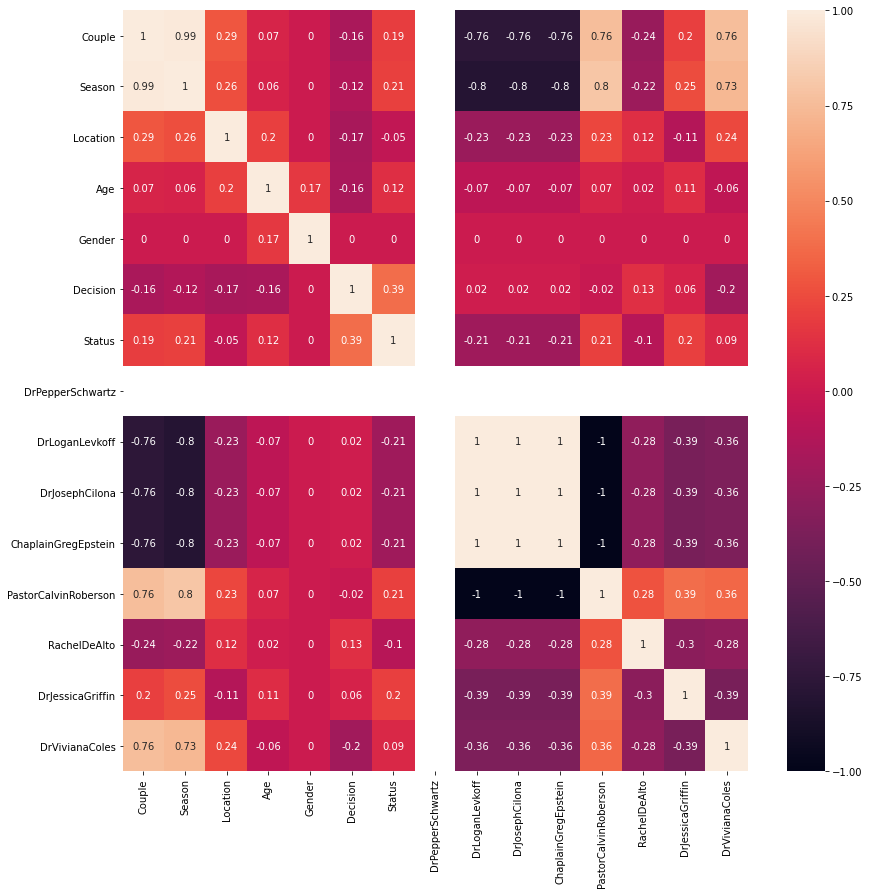

In [9]:
plt.figure(figsize=(14,14))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

From the graphs and heatmaps, we can see the features 'Decision', 'Season', 'Age', 'DrLoganLevkoff', 'DrJosephCilona', 'ChaplainGregEpstein', 'PastorCalvinRoberson', 'DrJessicaGriffin' have a good correlation with the target variable. Let's see how they depend on each other.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


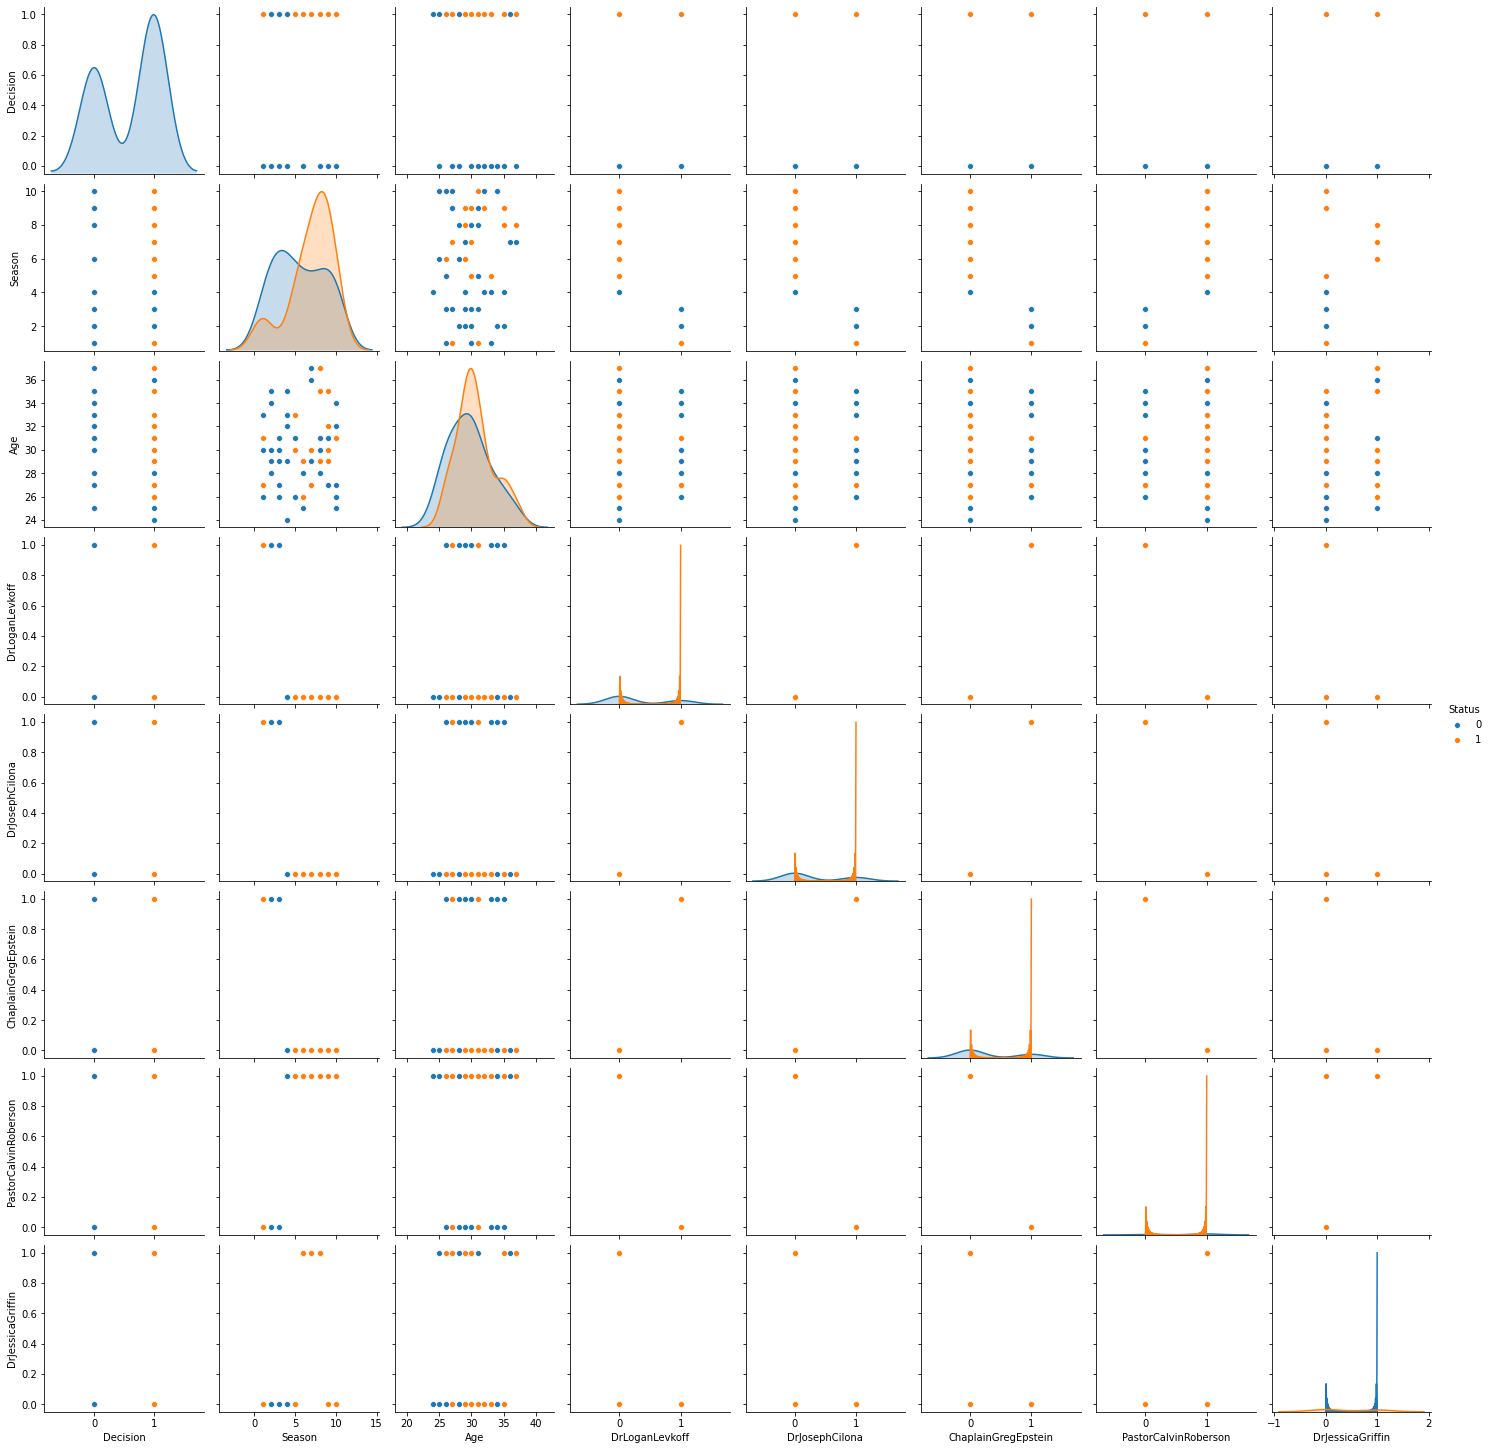

In [10]:
sns.pairplot(df, hue='Status', vars=['Decision', 'Season', 'Age', 'DrLoganLevkoff', 'DrJosephCilona', 'ChaplainGregEpstein', 'PastorCalvinRoberson', 'DrJessicaGriffin'])

## Plotting graphs

In [0]:
X = df[['Decision', 'Season', 'Age', 'DrLoganLevkoff', 'DrJosephCilona', 'ChaplainGregEpstein', 'PastorCalvinRoberson', 'DrJessicaGriffin']]
Y = df[['Status']]

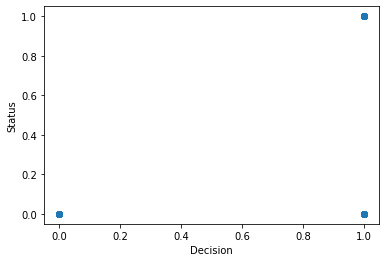

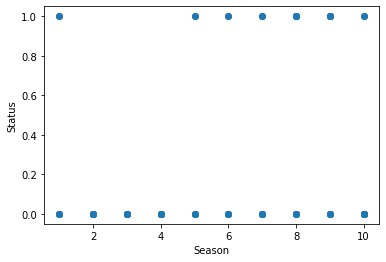

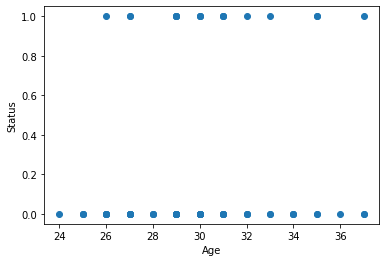

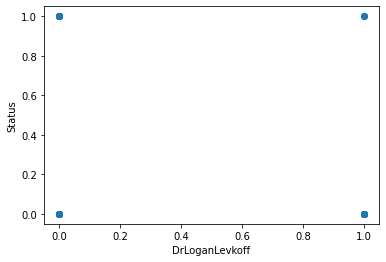

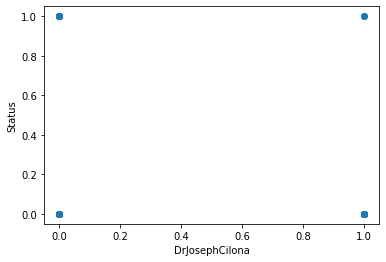

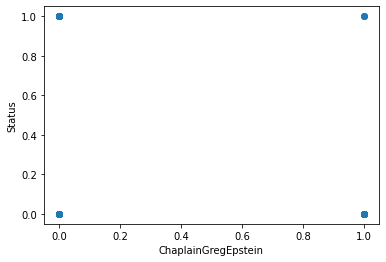

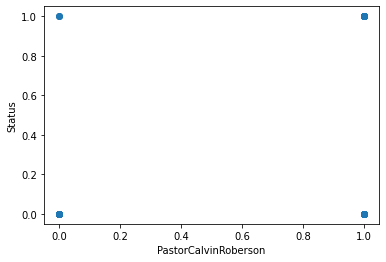

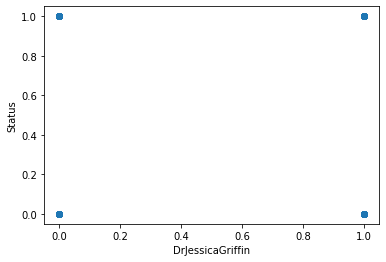

In [12]:
for i in ['Decision', 'Season', 'Age', 'DrLoganLevkoff', 'DrJosephCilona', 'ChaplainGregEpstein', 'PastorCalvinRoberson', 'DrJessicaGriffin']:
  x = df[i]
  y = df['Status']
  plt.xlabel(i)
  plt.ylabel('Status')
  plt.scatter(x, y)
  plt.show()

## Splitting our dataset
We use train_test_split to test our dataset into training and testing variables.

In [0]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)

## Using Logistic Regression
We create a logistic regression model.

In [0]:
model = LogisticRegression()

We train the Logistic Regression model using the fit method.

In [15]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We use the in-built score method to see how well our model fares

In [16]:
model.score(x_test, y_test)

0.8095238095238095

We use the predict method to see what our model predicts for the given test X values.

In [0]:
y_hat = model.predict(x_test)

Visualising the predictions of our model in the form of a confusion matrix to see how well our model performs

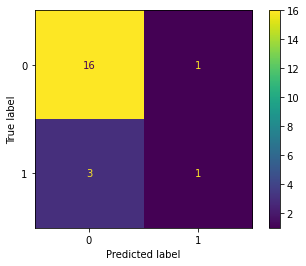

In [18]:
plot_confusion_matrix(model, x_test, y_test)

## Calculating TF, TN, FP, FN
Writing a function to manually calculate the True Positives, False Positives, True Negatives and False Negatives.

In [0]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [20]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(y_test), np.asarray(y_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 0.5
Recall is 0.25
Specificity is 0.9411764705882353
Accuracy is 0.8095238095238095


## Visualising the model's performance
We plot the actual data and predicted data for different features.


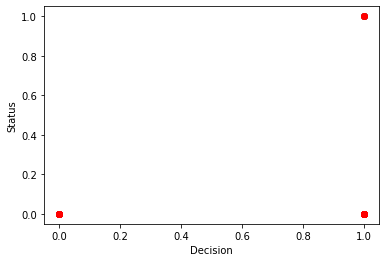

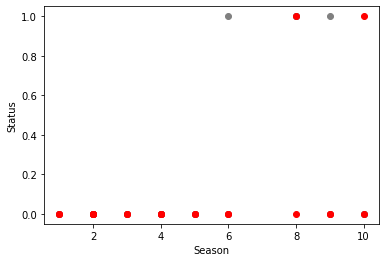

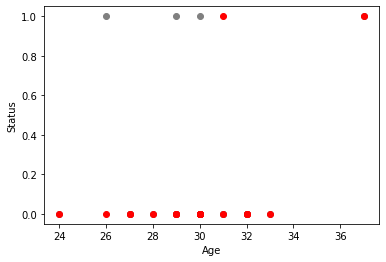

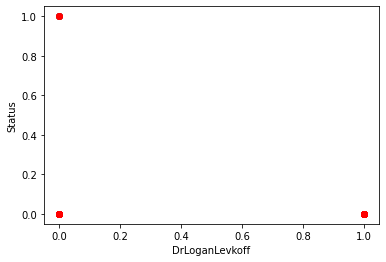

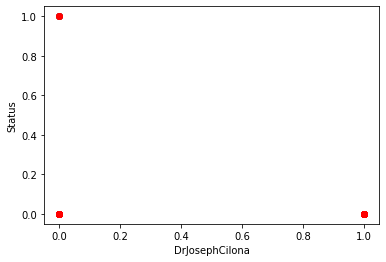

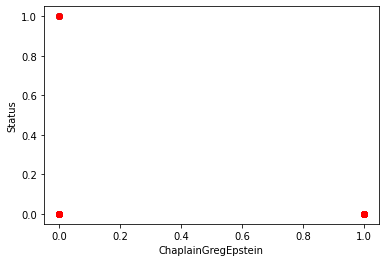

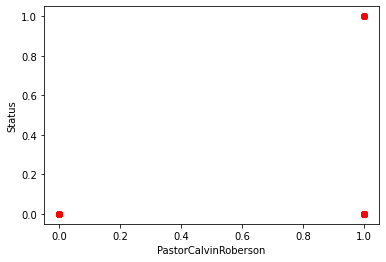

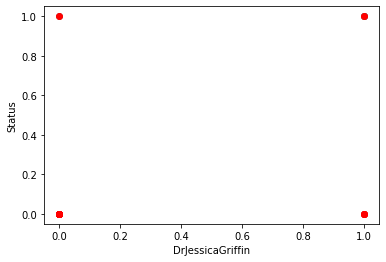

In [21]:
for i in ['Decision', 'Season', 'Age', 'DrLoganLevkoff', 'DrJosephCilona', 'ChaplainGregEpstein', 'PastorCalvinRoberson', 'DrJessicaGriffin']:
  x_temp = x_test[i]
  plt.scatter(x_temp, y_test, color='grey')
  plt.scatter(x_temp, y_hat, color='red')
  plt.xlabel(i)
  plt.ylabel("Status")
  plt.show()

## Using KNN

### Finding the value of K

To find the value of k that would give the most suitable result, we use a hit and trial approach. We plot a graph of errors vs k values and pick the value of K where the error becomes minimum.

In [22]:
scores = []
n = []
for i in range(1, 24):
  knnModel = KNeighborsClassifier(n_neighbors=i)
  knnModel.fit(X_train, Y_train)
  score = knnModel.score(x_test, y_test)
  scores.append(score)
  n.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-

In [23]:
max(scores)

0.8571428571428571

In [24]:
best_score_index = scores.index(max(scores))
best_n = n[(best_score_index)]
best_n

10

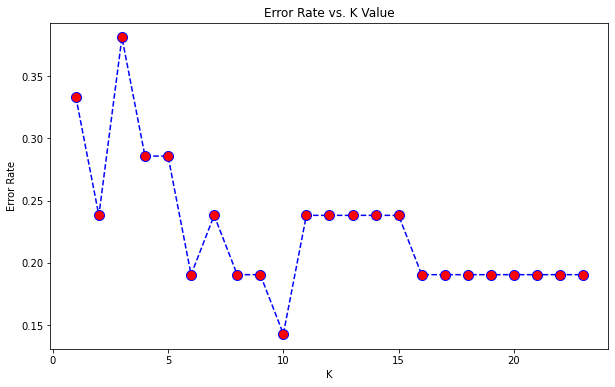

In [25]:
error_rate = [1 - x for x in scores]
plt.figure(figsize =(10, 6))
plt.plot(range(1, 24), error_rate, color ='blue', linestyle ='dashed', marker ='o', markerfacecolor ='red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We see that the errors decrease sharply for k = 10. We create a K Nearest Neighbors model, set n_neighbors to 10 and train the KNN model using the fit method.

In [26]:
knnModel = KNeighborsClassifier(n_neighbors=10)
knnModel.fit(X_train, Y_train)
knnModel.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8571428571428571

We make predictions for the X values in the testing dataset and store it in the y_knn_hat variable. Now we can compare the y_knn_hat variable with the y_test variable to compare the accuracy of our model.

In [0]:
y_knn_hat = knnModel.predict(x_test)

### Plotting a confusion matrix

Visualising the predictions of our model in the form of a confusion matrix to see how well our model performs.

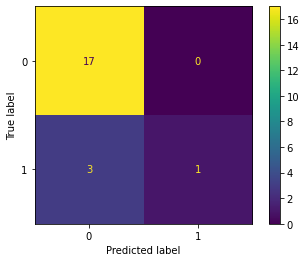

In [28]:
plot_confusion_matrix(knnModel, x_test, y_test)

Caculating True Positive, False Positive, True Negative, False Negatives. Also, we calculate the precision, recall, specificity and accuracy of our model.

In [29]:
truePositive, falsePositive, trueNegative, falseNegative = perf_measure(np.asarray(y_test), np.asarray(y_knn_hat))
print("Precision is", (truePositive / (truePositive + falsePositive)))
print("Recall is", (truePositive / (truePositive + falseNegative)))
print("Specificity is", (trueNegative / (trueNegative + falsePositive)))
print("Accuracy is", ((truePositive + trueNegative) / (truePositive + falsePositive + falseNegative + trueNegative)))

Precision is 1.0
Recall is 0.25
Specificity is 1.0
Accuracy is 0.8571428571428571


We plot the actual data and predicted data for different features.

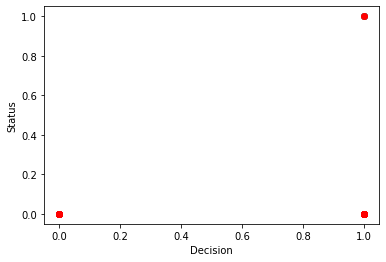

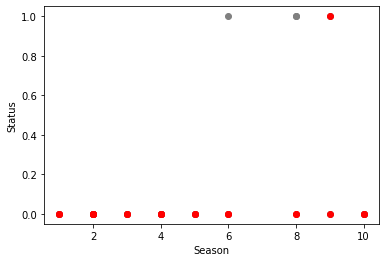

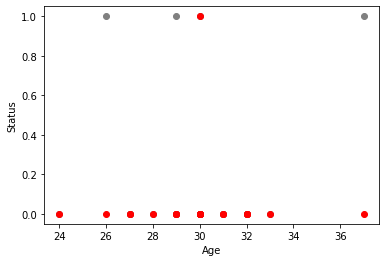

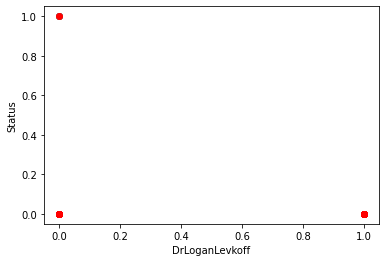

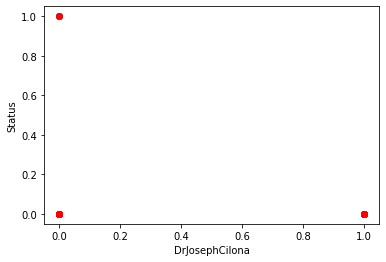

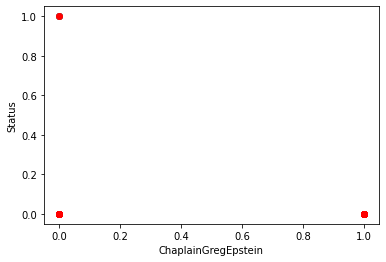

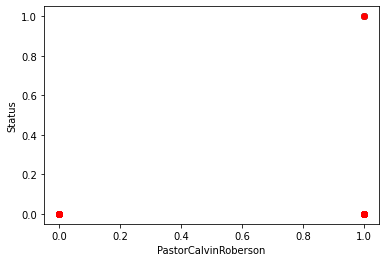

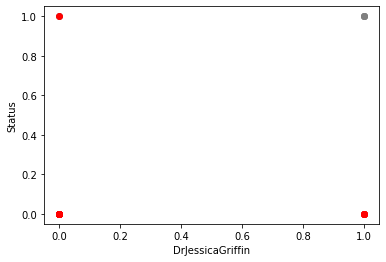

In [30]:
for i in ['Decision', 'Season', 'Age', 'DrLoganLevkoff', 'DrJosephCilona', 'ChaplainGregEpstein', 'PastorCalvinRoberson', 'DrJessicaGriffin']:
  x_temp = x_test[i]
  plt.scatter(x_temp, y_test, color='grey')
  plt.scatter(x_temp, y_knn_hat, color='red')
  plt.xlabel(i)
  plt.ylabel("Status")
  plt.show()

In [31]:
j_score = jaccard_similarity_score(y_test, y_knn_hat)
print("Jaccard similarity score", j_score)

Jaccard similarity score 0.8571428571428571


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Conclusion
Trained two different models, one using K Nearest Neighbors and Logistic Regression. Displayed the correlation between different features in the dataset using heatmaps and graphs. Also calculated the accuracy, specificity indicating the accuracy for both models. Also, visualised our predictions in the form of a confusion matrix.

We were able to train a model with about 85% accuracy for our given dataset, thus giving a fair insight about the thought "What makes couples stay together?" using features provided from the "Married at first sight" dataset.